In [1]:
print("JAI MATA DI")

JAI MATA DI


In [2]:
#Author Aditya Upadhyay
#Date 2024-10-14
#Purpose : Is baar 10
#Version : 1.0


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from PIL import Image
import os
import numpy as np

# Define paths to the train and test directories
train_dir = 'Dataset/Train'
test_dir = 'Dataset/Test'

# Check if the directories exist
if not os.path.exists(train_dir):
    raise FileNotFoundError(f"Training directory {train_dir} not found.")
if not os.path.exists(test_dir):
    raise FileNotFoundError(f"Test directory {test_dir} not found.")

# Function to load images from a directory and its subdirectories
def load_images_from_directory(directory):
    images = {}
    for root, _, files in os.walk(directory):
        class_name = os.path.basename(root)
        images[class_name] = []
        for filename in files:
            if filename.endswith(".jpg") or filename.endswith(".png"):
                img_path = os.path.join(root, filename)
                with Image.open(img_path) as img:
                    img_array = np.array(img)
                    images[class_name].append(img_array)
    return images

# Load images from the train and test directories
train_images = load_images_from_directory(train_dir)
test_images = load_images_from_directory(test_dir)

# Print the number of images loaded for each class
for class_name, images in train_images.items():
    print(f"Loaded {len(images)} images from class {class_name} in {train_dir}")
for class_name, images in test_images.items():
    print(f"Loaded {len(images)} images from class {class_name} in {test_dir}")


Loaded 0 images from class Train in Dataset/Train
Loaded 3995 images from class angry in Dataset/Train
Loaded 436 images from class disgust in Dataset/Train
Loaded 4097 images from class fear in Dataset/Train
Loaded 7215 images from class happy in Dataset/Train
Loaded 4965 images from class neutral in Dataset/Train
Loaded 4830 images from class sad in Dataset/Train
Loaded 3171 images from class surprise in Dataset/Train
Loaded 0 images from class Test in Dataset/Test
Loaded 958 images from class angry in Dataset/Test
Loaded 111 images from class disgust in Dataset/Test
Loaded 1024 images from class fear in Dataset/Test
Loaded 1774 images from class happy in Dataset/Test
Loaded 1233 images from class neutral in Dataset/Test
Loaded 1247 images from class sad in Dataset/Test
Loaded 831 images from class surprise in Dataset/Test


In [8]:
if "Train" in train_images:train_images.pop("Train")
if "Test" in test_images:test_images.pop("Test")

print(train_images.keys())
print(test_images.keys())

dict_keys(['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise'])
dict_keys(['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise'])


Train images:
Class angry: (48, 48)
Class disgust: (48, 48)
Class fear: (48, 48)
Class happy: (48, 48)
Class neutral: (48, 48)
Class sad: (48, 48)
Class surprise: (48, 48)
Test images:
Class angry: (48, 48)
Class disgust: (48, 48)
Class fear: (48, 48)
Class happy: (48, 48)
Class neutral: (48, 48)
Class sad: (48, 48)
Class surprise: (48, 48)
Number of images in each class:
Class angry: 3995
Class disgust: 436
Class fear: 4097
Class happy: 7215
Class neutral: 4965
Class sad: 4830
Class surprise: 3171
Class angry: 958
Class disgust: 111
Class fear: 1024
Class happy: 1774
Class neutral: 1233
Class sad: 1247
Class surprise: 831


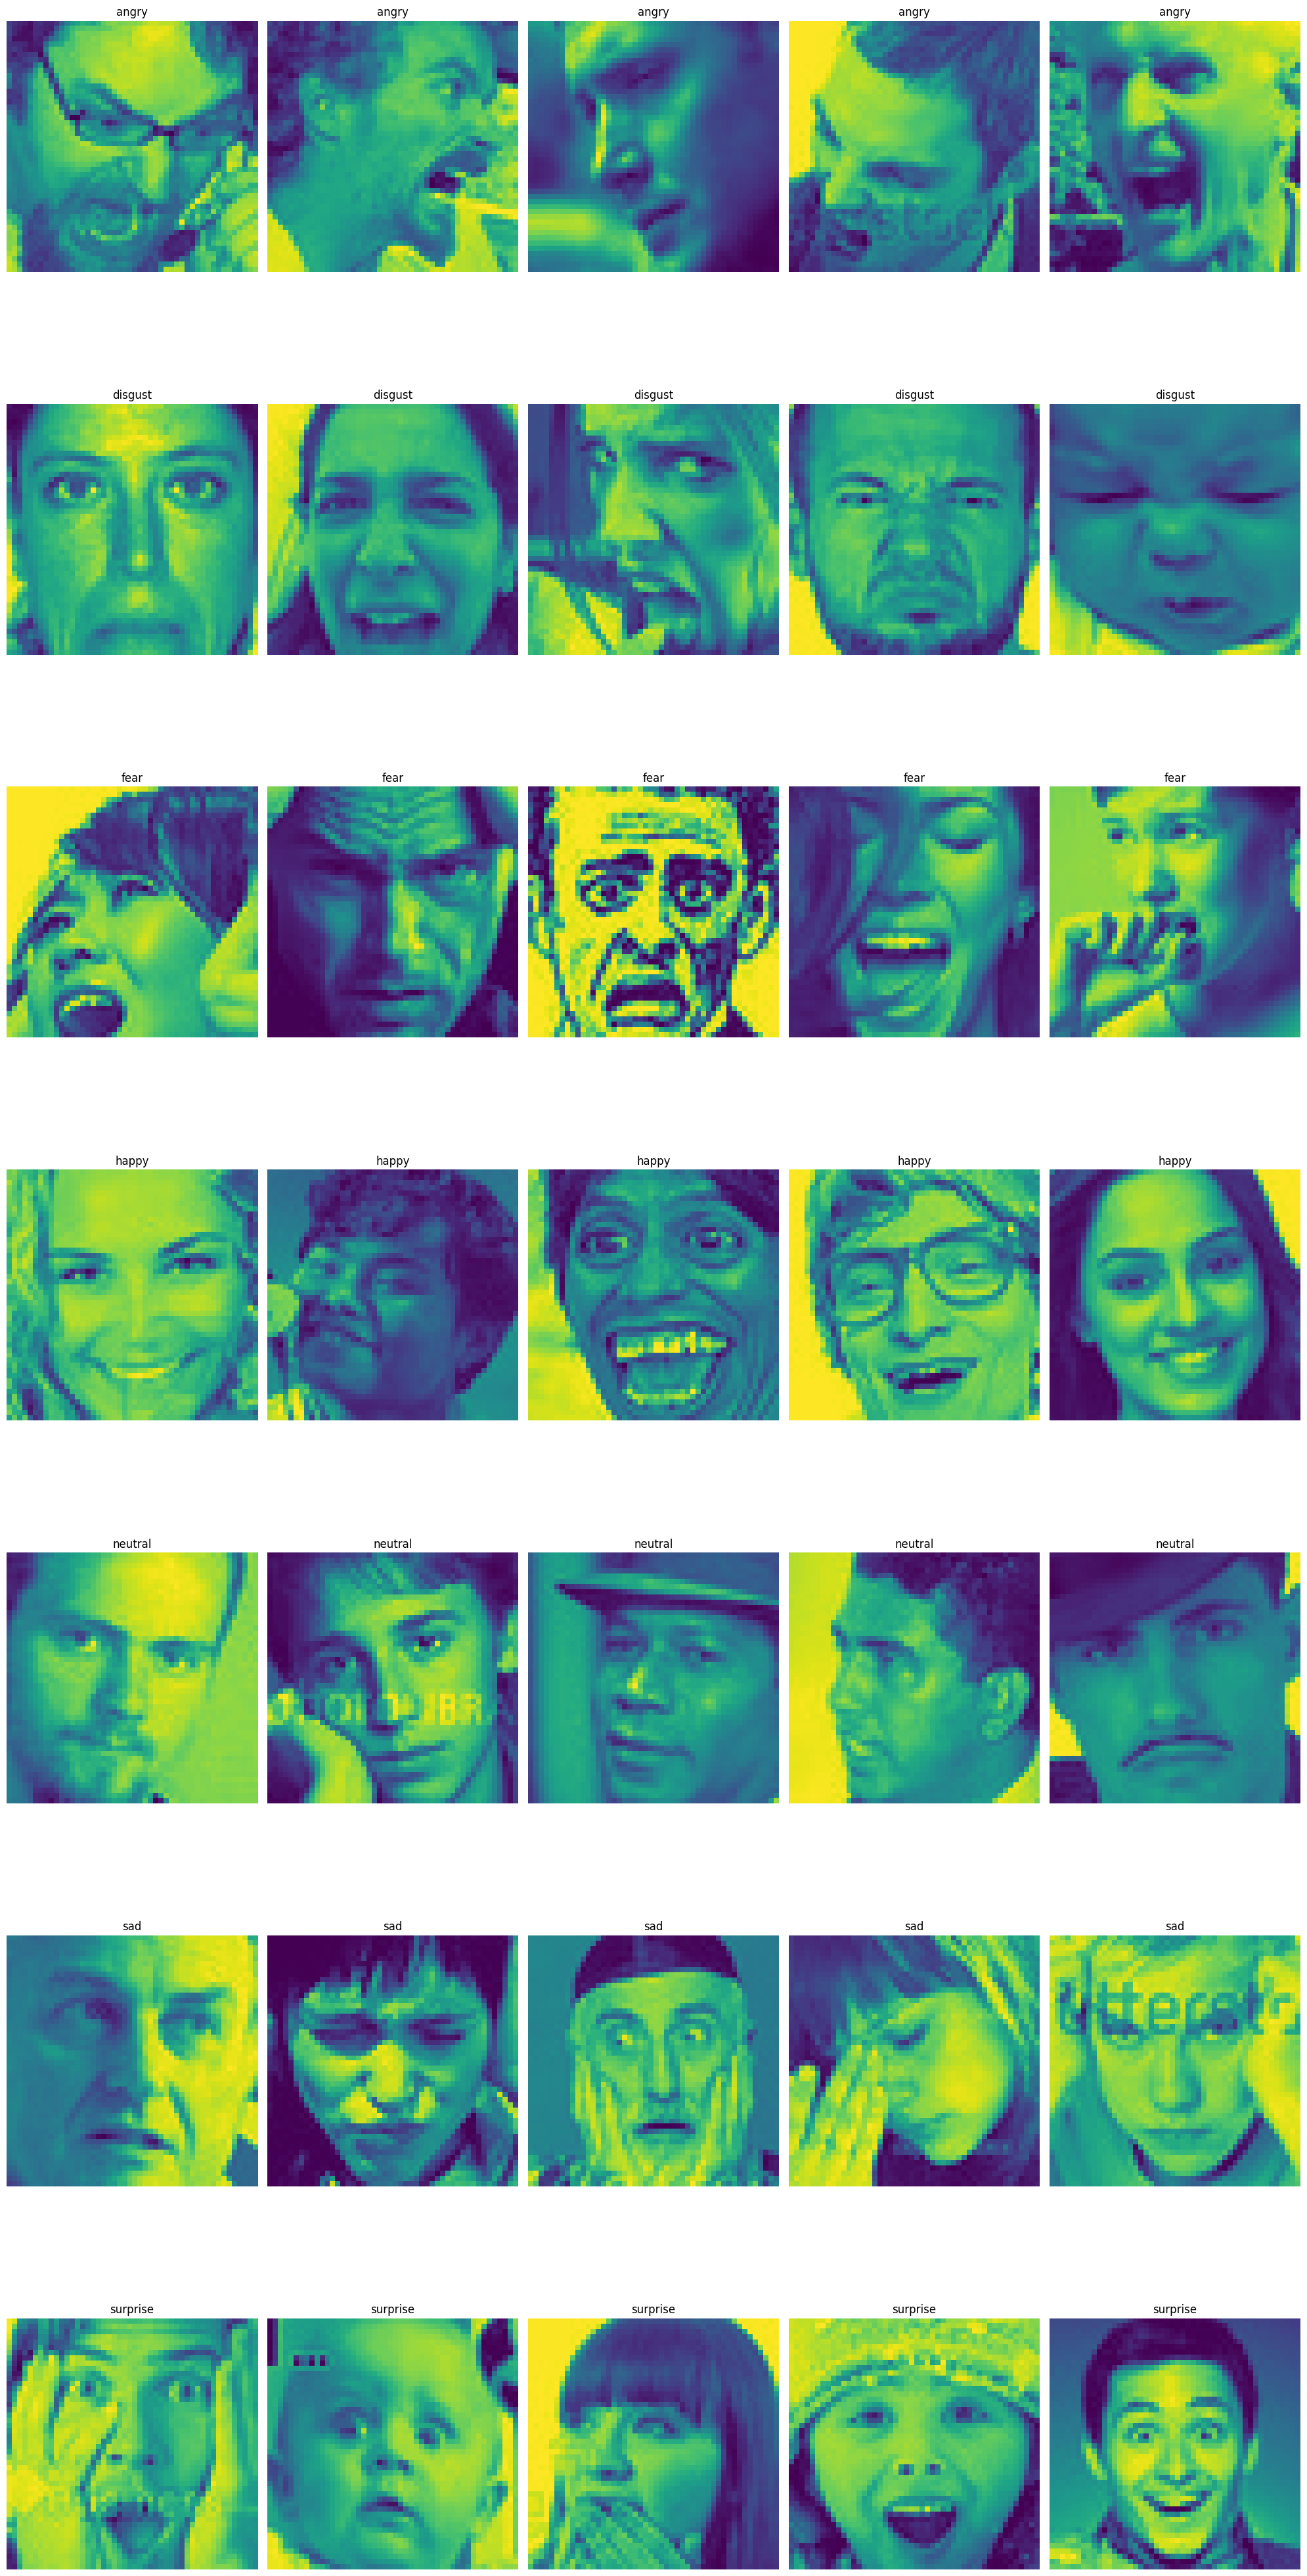

In [11]:
# lets do some EDA like checking the shape of the images etc...

# Check the shape of the images
print("Train images:")
for class_name, images in train_images.items():
    print(f"Class {class_name}: {images[0].shape}")
print("Test images:")
for class_name, images in test_images.items():
    print(f"Class {class_name}: {images[0].shape}")

# Check the number of images in each class
print("Number of images in each class:")
for class_name, images in train_images.items():
    print(f"Class {class_name}: {len(images)}")
for class_name, images in test_images.items():
    print(f"Class {class_name}: {len(images)}")
    
# Determine the number of rows needed based on the number of classes
num_classes = len(test_images)
fig, axes = plt.subplots(nrows=num_classes, ncols=5, figsize=(20, 6 * num_classes))
axes = axes.flatten()  # Flatten the axes array for easy indexing

# Plot the first 5 images of each class
index = 0
for class_name, images in test_images.items():
    for j in range(min(5, len(images))):
        axes[index].imshow(images[j])
        axes[index].set_title(class_name)
        axes[index].axis('off')
        index += 1
        
plt.tight_layout()
plt.show()


In [12]:
from PIL import Image, ImageEnhance, ImageOps
import numpy as np
import random

def augment_image(image):
    # Convert numpy array to PIL Image
    pil_image = Image.fromarray(image)

    # Random rotation
    if random.random() > 0.5:
        angle = random.uniform(-30, 30)
        pil_image = pil_image.rotate(angle)

    # Random horizontal flip
    if random.random() > 0.5:
        pil_image = ImageOps.mirror(pil_image)

    # Random vertical flip
    if random.random() > 0.5:
        pil_image = ImageOps.flip(pil_image)

    # Random Gaussian noise
    if random.random() > 0.5:
        np_image = np.array(pil_image)
        mean = 0
        std = random.uniform(0, 25)
        gauss = np.random.normal(mean, std, np_image.shape).astype('uint8')
        np_image = np.clip(np_image + gauss, 0, 255)
        pil_image = Image.fromarray(np_image)

    # Convert PIL Image back to numpy array
    return np.array(pil_image)

# Apply augmentation to all images in the train_images dictionary
augmented_train_images = {}
for class_name, images in train_images.items():
    augmented_train_images[class_name] = [augment_image(image) for image in images]

# Print the number of augmented images for each class
for class_name, images in augmented_train_images.items():
    print(f"Augmented {len(images)} images for class {class_name}")

Augmented 3995 images for class angry
Augmented 436 images for class disgust
Augmented 4097 images for class fear
Augmented 7215 images for class happy
Augmented 4965 images for class neutral
Augmented 4830 images for class sad
Augmented 3171 images for class surprise


In [14]:
# Merge augmented images with original training images
for class_name, images in augmented_train_images.items():
    if class_name in train_images:
        train_images[class_name].extend(images)
    else:
        train_images[class_name] = images



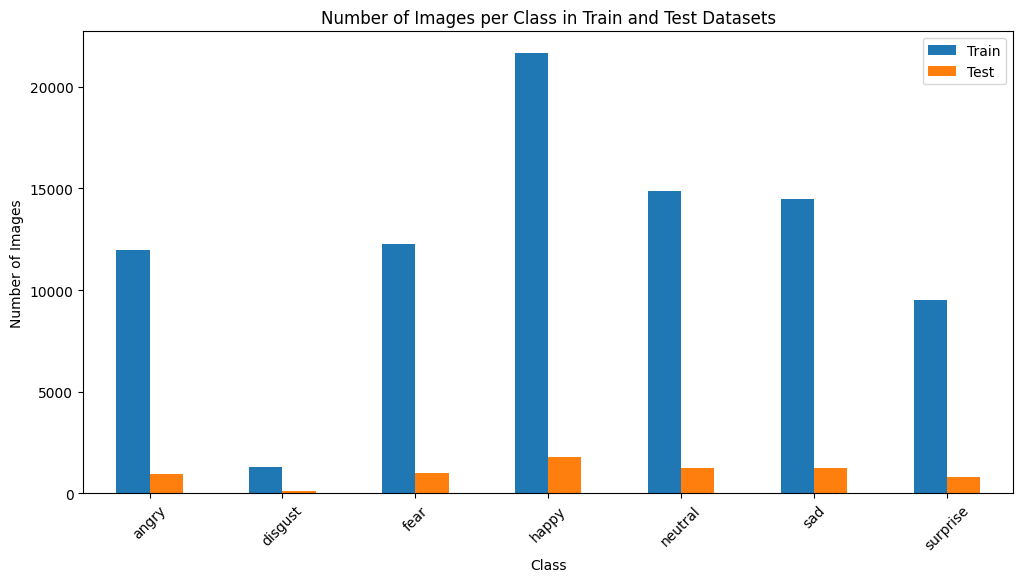

In [15]:
# Count the number of images in each class for train and test datasets
train_counts = {class_name: len(images) for class_name, images in train_images.items()}
test_counts = {class_name: len(images) for class_name, images in test_images.items()}

# Create a DataFrame for easy plotting
counts_df = pd.DataFrame({
    'Class': list(train_counts.keys()),
    'Train': list(train_counts.values()),
    'Test': [test_counts.get(class_name, 0) for class_name in train_counts.keys()]
})

# Plot the histograms
counts_df.plot(x='Class', kind='bar', figsize=(12, 6))
plt.title('Number of Images per Class in Train and Test Datasets')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.xticks(rotation=45)
plt.show()